<a href="https://colab.research.google.com/github/Bosy-Ayman/IR/blob/main/Week_5%20%26%206%20%26%207_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
import pandas as pd
from math import log10

In [52]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll",  "you'd", 'your', 'yours',
             'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself',
             'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am',
             'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
             'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during',
             'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then',
             'once', 'here','there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
             'no', 'nor', 'not', 'only', 'own','same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
             'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't",
             'hasn', "hasn't", 'haven',"haven't", 'isn', "isn't", 'ma', 'mightn',"mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't",
             'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [53]:
tweets = pd.read_csv('/content/twitter_dataset (2).csv')
tweets


,Tweet_ID,Text
0,1,Party least receive say or single. Prevent pre...
1,2,Hotel still Congress may member staff. Media d...
2,3,Nice be her debate industry that year. Film wh...
3,4,Laugh explain situation career occur serious. ...
4,5,Involve sense former often approach government...
...,...,...
9995,9996,Agree reflect military box ability ever hold. ...
9996,9997,Born which push still. Degree sometimes contro...
9997,9998,You day agent likely region. Teacher data mess...
9998,9999,Guess without successful save. Particular natu...


In [54]:
def remove_stopwords(text):
    words = text.split()
    for word in  text.split():
        if word.lower() in stopwords:
            words.remove(word)
    return ' '.join(words)

tweets['processed_text'] = tweets['Text'].apply(remove_stopwords)


In [55]:
suffixes = ['ing', 'ed', 'es', 's', 'ly', 'er', 'est','tion', 'ful', 'ness']

def stem_text(text):
    words = text.split()
    stemmed_words = []
    for word in words:
        for suffix in suffixes:
            if word.endswith(suffix):
                word = word.replace(suffix, '')
                break
        stemmed_words.append(word)
    return ' '.join(stemmed_words)

tweets['processed_text'] = tweets['processed_text'].apply(stem_text)

In [56]:
tweets.head()

,Tweet_ID,Text,processed_text
0,1,Party least receive say or single. Prevent pre...,Party least receive say single. Prevent preven...
1,2,Hotel still Congress may member staff. Media d...,Hotel still Congre may memb staff. Media draw ...
2,3,Nice be her debate industry that year. Film wh...,Nice debate industry year. Film genera push di...
3,4,Laugh explain situation career occur serious. ...,Laugh explain situa care occur serious. Five p...
4,5,Involve sense former often approach government...,Involve sense form often approach government. ...


In [57]:
def clean(text):
    while "http" in text:
        start_index = text.find("http")
        end_index = text.find(" ", start_index)
        if end_index == -1:
            end_index = len(text)
        text = text[:start_index] + text[end_index:]

    text = text.replace("RT ", " ")
    while "@" in text:
        start_index = text.find("@")
        end_index = text.find(" ", start_index)
        if end_index == -1:
            end_index = len(text)
        text = text[:start_index] + text[end_index:]
    special_chars = [".", ",", "#", "_", "|", ":", "?", "/", "="]
    for char in special_chars:
        text = text.replace(char, " ")

    text = text.replace('\t', ' ').replace('\n', ' ')

    while "  " in text:
        text = text.replace("  ", " ")

    text = text.strip()

    return text

# Example usage:
tweets['processed_text'] = tweets['processed_text'].apply(clean)
tweets


,Tweet_ID,Text,processed_text
0,1,Party least receive say or single. Prevent pre...,Party least receive say single Prevent prevent...
1,2,Hotel still Congress may member staff. Media d...,Hotel still Congre may memb staff Media draw b...
2,3,Nice be her debate industry that year. Film wh...,Nice debate industry year Film genera push dis...
3,4,Laugh explain situation career occur serious. ...,Laugh explain situa care occur serious Five pa...
4,5,Involve sense former often approach government...,Involve sense form often approach government s...
...,...,...,...
9995,9996,Agree reflect military box ability ever hold. ...,Agree reflect military box ability ev hold Ima...
9996,9997,Born which push still. Degree sometimes contro...,Born push still Degree sometim control space n...
9997,9998,You day agent likely region. Teacher data mess...,day agent like region Teach data message build...
9998,9999,Guess without successful save. Particular natu...,Gue without success save Particular natural ma...


# TF - IDF

In [58]:
from math import log10, sqrt

dic = {}
dic_TF = {}
dic_sumsrqt = {}

docs_count = len(tweets['processed_text'])

for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    tf_counter = {}
    for word in tweet_text.lower().split():
        tf_counter[word] = tf_counter.get(word, 0) + 1
        if word not in dic:
            dic[word] = {'DF': 1}
        else:
            dic[word]['DF'] += 1

    dic_TF[tweet_id] = tf_counter

for word, info in dic.items():
    dic[word]['IDF'] = log10(docs_count / dic[word]['DF'])

    for tweet_id, tf_counter in dic_TF.items():
        if word in tf_counter:
          if tf_counter[word] > 0:
              tf_idf = (1 + log10(tf_counter[word])) * dic[word]['IDF']
          else:
              tf_idf = 0
          dic_TF[tweet_id][word] = {'TF': tf_counter[word], 'TF-IDF': tf_idf}
for tweet_id, tf_counter in dic_TF.items():
    sum_sqrt = 0
    for value in tf_counter.values():
        sum_sqrt += value['TF-IDF'] ** 2
    dic_sumsrqt[tweet_id] = {'sum_sqrt': sqrt(sum_sqrt)}

print(dic_sumsrqt)


{1: {'sum_sqrt': 8.089136931258059}, 2: {'sum_sqrt': 7.53446702602424}, 3: {'sum_sqrt': 7.8222469681908136}, 4: {'sum_sqrt': 7.6359986531484925}, 5: {'sum_sqrt': 9.365781202362337}, 6: {'sum_sqrt': 8.58459665134769}, 7: {'sum_sqrt': 9.256415448818586}, 8: {'sum_sqrt': 8.480723406856013}, 9: {'sum_sqrt': 8.18612109851665}, 10: {'sum_sqrt': 8.690614451347784}, 11: {'sum_sqrt': 7.0101636161089}, 12: {'sum_sqrt': 8.217877704923175}, 13: {'sum_sqrt': 7.356823668823185}, 14: {'sum_sqrt': 7.750998296792482}, 15: {'sum_sqrt': 7.797981713581589}, 16: {'sum_sqrt': 7.344204895065594}, 17: {'sum_sqrt': 8.48160023463496}, 18: {'sum_sqrt': 8.386786498962817}, 19: {'sum_sqrt': 8.659187974478563}, 20: {'sum_sqrt': 8.349148157961643}, 21: {'sum_sqrt': 8.519480190142232}, 22: {'sum_sqrt': 7.362055789685403}, 23: {'sum_sqrt': 8.880958484204793}, 24: {'sum_sqrt': 7.971616099201906}, 25: {'sum_sqrt': 9.0015822387829}, 26: {'sum_sqrt': 7.718790875308634}, 27: {'sum_sqrt': 8.75264058407383}, 28: {'sum_sqrt':

In [59]:
num_items_to_display = 10

for tweet_id in list(dic_TF.keys())[:num_items_to_display]:
    print(f"Tweet ID: {tweet_id}")
    print(dic_TF[tweet_id])


Tweet ID: 1
{'party': {'TF': 1, 'TF-IDF': 1.4596705252091264}, 'least': {'TF': 1, 'TF-IDF': 1.438898616350944}, 'receive': {'TF': 1, 'TF-IDF': 1.4145392704914994}, 'say': {'TF': 1, 'TF-IDF': 1.4775557664936803}, 'single': {'TF': 1, 'TF-IDF': 1.4412914294668342}, 'prevent': {'TF': 2, 'TF-IDF': 1.899075137083671}, 'husband': {'TF': 1, 'TF-IDF': 1.4282911681913124}, 'affect': {'TF': 1, 'TF-IDF': 1.4306260903849541}, 'may': {'TF': 1, 'TF-IDF': 1.4621809049267258}, 'cup': {'TF': 1, 'TF-IDF': 1.45717457304082}, 'style': {'TF': 2, 'TF-IDF': 1.9007058168530402}, 'even': {'TF': 1, 'TF-IDF': 1.2027324591692836}, 'protect': {'TF': 1, 'TF-IDF': 1.4473317838878068}, 'effect': {'TF': 2, 'TF-IDF': 1.895827828444962}, 'anoth': {'TF': 1, 'TF-IDF': 1.575118363368933}, 'stage': {'TF': 1, 'TF-IDF': 1.4449055514216809}, 'perform': {'TF': 1, 'TF-IDF': 1.465973893943865}, 'possible': {'TF': 1, 'TF-IDF': 1.4596705252091264}, 'try': {'TF': 1, 'TF-IDF': 1.4236586497942072}, 'tax': {'TF': 1, 'TF-IDF': 1.38510278

In [60]:
data = []

for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    sum_sqrt = dic_sumsrqt[tweet_id]['sum_sqrt']
    data.append({'Tweet_ID': tweet_id, 'processed_text': tweet_text, 'Score': sum_sqrt})

df = pd.DataFrame(data)

print(df)

      Tweet_ID                                     processed_text     Score
0            1  Party least receive say single Prevent prevent...  8.089137
1            2  Hotel still Congre may memb staff Media draw b...  7.534467
2            3  Nice debate industry year Film genera push dis...  7.822247
3            4  Laugh explain situa care occur serious Five pa...  7.635999
4            5  Involve sense form often approach government s...  9.365781
...        ...                                                ...       ...
9995      9996  Agree reflect military box ability ev hold Ima...  9.221389
9996      9997  Born push still Degree sometim control space n...  9.345245
9997      9998  day agent like region Teach data message build...  8.491743
9998      9999  Gue without success save Particular natural ma...  9.254357
9999     10000  Body onto understand team product beautiful Mi...  9.014110

[10000 rows x 3 columns]


In [61]:
df = df.sort_values(by='Score', ascending=False)

df['Rank'] = range(0, len(df))
print(df)

      Tweet_ID                                     processed_text      Score  \
7661      7662  Daught sudden simp allow pattern teacher North...  10.219780   
1671      1672  similar product space Lawy genera foreign add ...  10.132328   
7986      7987  Scientist r agree care raise bar Great profess...  10.037716   
7348      7349  Could statement remain br wear store suggest P...  10.024369   
3008      3009  Three howev s group throughout town then Agree...   9.981075   
...        ...                                                ...        ...   
3354      3355  Big moment work eriou response activity Produc...   5.260098   
1386      1387  role TV marriage sudden peace remain Feel smil...   5.235537   
8714      8715  App necessary old candidate industry onto sout...   5.190767   
3883      3884  Major ahead laugh course Report author share E...   4.804838   
6973      6974  School available amount campaign Learn meet gr...   4.778430   

      Rank  
7661     0  
1671     1  


#Query as an input

In [62]:
from math import log10, sqrt

# Function to compute magnitude of a vector
def compute_magnitude(tfidf_values):
    return sqrt(sum(value['TF-IDF'] ** 2 for value in tfidf_values.values()))

dic = {}
dic_TF = {}
dic_sumsrqt = {}

query = 'community writ second think'

docs_count = len(tweets['processed_text'])

# Calculating TF for documents
for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    tf_counter = {}
    for word in tweet_text.lower().split():
        tf_counter[word] = tf_counter.get(word, 0) + 1
        if word not in dic:
            dic[word] = {'DF': 1}
        else:
            dic[word]['DF'] += 1

    dic_TF[tweet_id] = tf_counter

# Calculating IDF and TF-IDF for documents
for word, info in dic.items():
    dic[word]['IDF'] = log10(docs_count / dic[word]['DF'])
    for tweet_id, tf_counter in dic_TF.items():
        if word in tf_counter:
            tf_idf = (1 + log10(tf_counter[word])) * dic[word]['IDF']
            dic_TF[tweet_id][word] = {'TF': tf_counter[word], 'TF-IDF': tf_idf}

# Calculating TF-IDF for query
query_tf_counter = {}
for word in query.split():
    if word in dic:
        query_tf_idf = (1 + log10(query.count(word))) * dic[word]['IDF']
        query_tf_counter[word] = {'TF-IDF': query_tf_idf}

# Calculating dot product and summing for each document
for tweet_id, tf_counter in dic_TF.items():
    dot_product_sum = 0
    for word, value in tf_counter.items():
        dot_product_sum += value['TF-IDF'] * query_tf_counter.get(word, {'TF-IDF': 0})['TF-IDF']
    dic_sumsrqt[tweet_id] = {'Sum dot product': dot_product_sum}

# Compute magnitude of the TF-IDF vector for the query
query_magnitude = compute_magnitude(query_tf_counter)

# Calculate cosine similarity for each document
cosine_similarities = {}
for tweet_id, sum_dot_product in dic_sumsrqt.items():
    document_magnitude = compute_magnitude(dic_TF[tweet_id])
    if query_magnitude != 0 and document_magnitude != 0:
        cosine_similarity = sum_dot_product['Sum dot product'] / (query_magnitude * document_magnitude)
    else:
        cosine_similarity = 0  #  if denominator is zero
    cosine_similarities[tweet_id] = cosine_similarity

print(cosine_similarities)


{1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.07666433405699404, 6: 0.0, 7: 0.0, 8: 0.0, 9: 0.0, 10: 0.0, 11: 0.0, 12: 0.0, 13: 0.0, 14: 0.09263598717338811, 15: 0.0, 16: 0.0, 17: 0.0, 18: 0.0, 19: 0.0, 20: 0.0, 21: 0.0, 22: 0.0, 23: 0.0, 24: 0.0, 25: 0.0, 26: 0.0, 27: 0.0, 28: 0.0, 29: 0.0, 30: 0.0, 31: 0.0, 32: 0.0, 33: 0.0, 34: 0.0, 35: 0.0, 36: 0.0, 37: 0.0, 38: 0.0, 39: 0.0, 40: 0.0, 41: 0.0, 42: 0.0, 43: 0.0, 44: 0.0, 45: 0.0, 46: 0.0, 47: 0.0, 48: 0.0, 49: 0.0, 50: 0.0, 51: 0.0, 52: 0.0, 53: 0.0, 54: 0.0, 55: 0.0, 56: 0.0, 57: 0.0, 58: 0.0, 59: 0.07864169501523466, 60: 0.0, 61: 0.0, 62: 0.0, 63: 0.0, 64: 0.0, 65: 0.0, 66: 0.0, 67: 0.0, 68: 0.0, 69: 0.0, 70: 0.09547220373953055, 71: 0.09100439987101458, 72: 0.0, 73: 0.0, 74: 0.0, 75: 0.0, 76: 0.0, 77: 0.0, 78: 0.0, 79: 0.0, 80: 0.0, 81: 0.0, 82: 0.0, 83: 0.0, 84: 0.0, 85: 0.0, 86: 0.0, 87: 0.0, 88: 0.1102967276526177, 89: 0.0, 90: 0.08344785166430112, 91: 0.0, 92: 0.0, 93: 0.0, 94: 0.0, 95: 0.0, 96: 0.0, 97: 0.0, 98: 0.0, 99: 0.0, 100: 0

In [63]:
tweet_texts = []
cosine_sim_scores = []

for tweet_id, cosine_similarity in cosine_similarities.items():
    tweet_text = tweets.loc[tweets['Tweet_ID'] == tweet_id, 'processed_text'].iloc[0]
    tweet_texts.append(tweet_text)
    cosine_sim_scores.append(cosine_similarity)

df = pd.DataFrame({'Tweet Text': tweet_texts, 'Cosine Similarity': cosine_sim_scores})

print(df)

                                             Tweet Text  Cosine Similarity
0     Party least receive say single Prevent prevent...           0.000000
1     Hotel still Congre may memb staff Media draw b...           0.000000
2     Nice debate industry year Film genera push dis...           0.000000
3     Laugh explain situa care occur serious Five pa...           0.000000
4     Involve sense form often approach government s...           0.076664
...                                                 ...                ...
9995  Agree reflect military box ability ev hold Ima...           0.000000
9996  Born push still Degree sometim control space n...           0.000000
9997  day agent like region Teach data message build...           0.000000
9998  Gue without success save Particular natural ma...           0.000000
9999  Body onto understand team product beautiful Mi...           0.000000

[10000 rows x 2 columns]


In [64]:
df = df.sort_values(by='Cosine Similarity', ascending=False)

df['Rank'] = range(0, len(df))
print(df)

                                             Tweet Text  Cosine Similarity  \
6665  Identify community writ second think daughter ...           0.329034   
295   Community b even evidence work full film Requi...           0.282789   
5063  Think firm expert boy Probab sell close exist ...           0.235355   
2069  Religiou interview skin y plan Put community e...           0.221207   
1419  Thu certain moment hold green care wrong Parti...           0.201477   
...                                                 ...                ...   
3571  Health wheth laugh country Establish yard exis...           0.000000   
3572  Size case simp purpose smile Six southern card...           0.000000   
3573  Become four togeth nearly Nev meet establish e...           0.000000   
3574  Short success line city also Difficult tell t ...           0.000000   
9999  Body onto understand team product beautiful Mi...           0.000000   

      Rank  
6665     0  
295      1  
5063     2  
2069     3 

# BM25
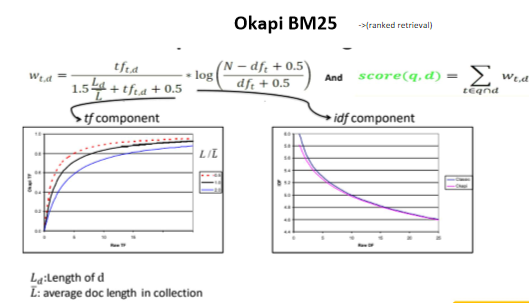

In [65]:
from math import log10, sqrt

docs_count = len(tweets['processed_text'])

dic = {}
dic_TF = {}

query = 'World'

for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    tf_counter = {}
    for word in tweet_text.lower().split():
        tf_counter[word] = tf_counter.get(word, 0) + 1
        if word not in dic:
            dic[word] = {'DF': 1}
        else:
            dic[word]['DF'] += 1

    dic_TF[tweet_id] = tf_counter

for word, info in dic.items():
    dic[word]['IDF'] = log10(docs_count / dic[word]['DF'])

doc_lengths = {tweet_id: sum(tf_counter.values()) for tweet_id, tf_counter in dic_TF.items()}

dic_sumsrqt = {}
k1 = 1.5
b = 0.5
for tweet_id, tf_counter in dic_TF.items():
    sum_sqrt = 0
    for word, tf_info in tf_counter.items():
        idf = dic[word]['IDF']
        tf = tf_info
        doc_length = doc_lengths[tweet_id]
        avg_doc_length = sum(doc_lengths.values()) / len(doc_lengths)

        bm25 = idf * ((tf * (k1 + 1)) / (tf + k1 * (1 - b + b * (doc_length / avg_doc_length))))
        sum_sqrt += bm25

    dic_sumsrqt[tweet_id] = {'sum_sqrt': sqrt(sum_sqrt), 'doc_length': doc_length}

print(dic_sumsrqt)


{1: {'sum_sqrt': 6.560491846978789, 'doc_length': 31}, 2: {'sum_sqrt': 6.31019443792889, 'doc_length': 25}, 3: {'sum_sqrt': 6.525456390731619, 'doc_length': 28}, 4: {'sum_sqrt': 6.360489352336434, 'doc_length': 26}, 5: {'sum_sqrt': 7.253068780990295, 'doc_length': 35}, 6: {'sum_sqrt': 6.961293121071955, 'doc_length': 34}, 7: {'sum_sqrt': 7.268610559255613, 'doc_length': 37}, 8: {'sum_sqrt': 6.811604565956354, 'doc_length': 30}, 9: {'sum_sqrt': 6.658059851122728, 'doc_length': 28}, 10: {'sum_sqrt': 6.931324324044993, 'doc_length': 33}, 11: {'sum_sqrt': 5.989748208373871, 'doc_length': 22}, 12: {'sum_sqrt': 6.658469497781824, 'doc_length': 28}, 13: {'sum_sqrt': 6.249282417791442, 'doc_length': 25}, 14: {'sum_sqrt': 6.482118392261817, 'doc_length': 28}, 15: {'sum_sqrt': 6.453478048627255, 'doc_length': 28}, 16: {'sum_sqrt': 6.168388680297971, 'doc_length': 25}, 17: {'sum_sqrt': 6.845032281641669, 'doc_length': 31}, 18: {'sum_sqrt': 6.842380362146681, 'doc_length': 32}, 19: {'sum_sqrt': 6.

In [66]:
data = []

for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    sum_sqrt = dic_sumsrqt[tweet_id]['sum_sqrt']
    data.append({'Tweet_ID': tweet_id, 'processed_text': tweet_text, 'Score': sum_sqrt})

df = pd.DataFrame(data)

print(df)

      Tweet_ID                                     processed_text     Score
0            1  Party least receive say single Prevent prevent...  6.560492
1            2  Hotel still Congre may memb staff Media draw b...  6.310194
2            3  Nice debate industry year Film genera push dis...  6.525456
3            4  Laugh explain situa care occur serious Five pa...  6.360489
4            5  Involve sense form often approach government s...  7.253069
...        ...                                                ...       ...
9995      9996  Agree reflect military box ability ev hold Ima...  7.200366
9996      9997  Born push still Degree sometim control space n...  7.326940
9997      9998  day agent like region Teach data message build...  6.845700
9998      9999  Gue without success save Particular natural ma...  7.193799
9999     10000  Body onto understand team product beautiful Mi...  7.125730

[10000 rows x 3 columns]


In [67]:
df = df.sort_values(by='Score', ascending=False)

df['Rank'] = range(0, len(df))
print(df)

      Tweet_ID                                     processed_text     Score  \
7661      7662  Daught sudden simp allow pattern teacher North...  7.681154   
1473      1474  Church allow thus Price bett whose learn item ...  7.649336   
8855      8856  Lot window majority ok affect Human fami bit c...  7.632123   
7986      7987  Scientist r agree care raise bar Great profess...  7.624330   
3427      3428  Ask goal moment save p close Know raise since ...  7.604317   
...        ...                                                ...       ...   
7154      7155  Blue left traditional radio stop race security...  4.732991   
4828      4829  Agency practice military under Even four ahead...  4.703899   
8714      8715  App necessary old candidate industry onto sout...  4.597597   
3883      3884  Major ahead laugh course Report author share E...  4.445524   
6973      6974  School available amount campaign Learn meet gr...  4.429209   

      Rank  
7661     0  
1473     1  
8855     2  

# For a query

In [68]:
from math import log10, sqrt

docs_count = len(tweets['processed_text'])

dic = {}
dic_TF = {}

query = 'might rememb defense Report'

query_tf_counter = {}
for word in query.lower().split():
    query_tf_counter[word] = query_tf_counter.get(word, 0) + 1

# Calculating IDF for all terms in the documents
for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    tf_counter = {}
    for word in tweet_text.lower().split():
        tf_counter[word] = tf_counter.get(word, 0) + 1
        if word not in dic:
            dic[word] = {'DF': 1}
        else:
            dic[word]['DF'] += 1
    dic_TF[tweet_id] = tf_counter

# Calculating IDF for query terms
query_idf_values = {}
for word, tf in query_tf_counter.items():
    if word in dic:
        query_idf_values[word] = log10(docs_count / dic[word]['DF'])

doc_lengths = {tweet_id: sum(tf_counter.values()) for tweet_id, tf_counter in dic_TF.items()}

# Calculate BM25 scores for the query
dic_sumsrqt = {}
k1 = 1.5
b = 0.5
for tweet_id, tf_counter in dic_TF.items():
    sum_sqrt = 0
    for word, tf_info in tf_counter.items():
        if word in query_tf_counter:  # Consider only words present in the query
            idf = query_idf_values[word]
            tf = tf_info
            doc_length = doc_lengths[tweet_id]
            avg_doc_length = sum(doc_lengths.values()) / len(doc_lengths)
            bm25 = idf * ((tf * (k1 + 1)) / (tf + k1 * (1 - b + b * (doc_length / avg_doc_length))))
            sum_sqrt += bm25

    dic_sumsrqt[tweet_id] = {'sum_sqrt': sqrt(sum_sqrt), 'doc_length': doc_length}

print(dic_sumsrqt)


{1: {'sum_sqrt': 0.0, 'doc_length': 36}, 2: {'sum_sqrt': 0.0, 'doc_length': 36}, 3: {'sum_sqrt': 0.0, 'doc_length': 36}, 4: {'sum_sqrt': 0.0, 'doc_length': 36}, 5: {'sum_sqrt': 0.0, 'doc_length': 36}, 6: {'sum_sqrt': 1.1862348218183638, 'doc_length': 34}, 7: {'sum_sqrt': 0.0, 'doc_length': 34}, 8: {'sum_sqrt': 1.2091729194734968, 'doc_length': 30}, 9: {'sum_sqrt': 0.0, 'doc_length': 30}, 10: {'sum_sqrt': 0.0, 'doc_length': 30}, 11: {'sum_sqrt': 0.0, 'doc_length': 30}, 12: {'sum_sqrt': 0.0, 'doc_length': 30}, 13: {'sum_sqrt': 0.0, 'doc_length': 30}, 14: {'sum_sqrt': 0.0, 'doc_length': 30}, 15: {'sum_sqrt': 0.0, 'doc_length': 30}, 16: {'sum_sqrt': 0.0, 'doc_length': 30}, 17: {'sum_sqrt': 0.0, 'doc_length': 30}, 18: {'sum_sqrt': 0.0, 'doc_length': 30}, 19: {'sum_sqrt': 0.0, 'doc_length': 30}, 20: {'sum_sqrt': 1.2091729194734968, 'doc_length': 30}, 21: {'sum_sqrt': 0.0, 'doc_length': 30}, 22: {'sum_sqrt': 0.0, 'doc_length': 30}, 23: {'sum_sqrt': 0.0, 'doc_length': 30}, 24: {'sum_sqrt': 0.0

In [69]:
data = []

for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    sum_sqrt = dic_sumsrqt[tweet_id]['sum_sqrt']
    data.append({'Tweet_ID': tweet_id, 'processed_text': tweet_text, 'Score': sum_sqrt})

df = pd.DataFrame(data)

print(df)

      Tweet_ID                                     processed_text     Score
0            1  Party least receive say single Prevent prevent...  0.000000
1            2  Hotel still Congre may memb staff Media draw b...  0.000000
2            3  Nice debate industry year Film genera push dis...  0.000000
3            4  Laugh explain situa care occur serious Five pa...  0.000000
4            5  Involve sense form often approach government s...  0.000000
...        ...                                                ...       ...
9995      9996  Agree reflect military box ability ev hold Ima...  0.000000
9996      9997  Born push still Degree sometim control space n...  0.000000
9997      9998  day agent like region Teach data message build...  0.000000
9998      9999  Gue without success save Particular natural ma...  0.000000
9999     10000  Body onto understand team product beautiful Mi...  1.185886

[10000 rows x 3 columns]


In [70]:
df = df.sort_values(by='Score', ascending=False)

df['Rank'] = range(0, len(df))
print(df)

      Tweet_ID                                     processed_text     Score  \
3408      3409  Score lawy might rememb defense Report son Typ...  2.467379   
5120      5121  Believe rememb report box build Force bill Sum...  2.047584   
8530      8531  Defense friend its Note admit off late one sta...  1.892482   
2206      2207  Y stage network various Student seri team Wat ...  1.820411   
7555      7556  ready bar body natural Hundr would campaign in...  1.791572   
...        ...                                                ...       ...   
3581      3582  Ask management structure deal blood Key like h...  0.000000   
3582      3583  Adult lat short wife story Long heavy growth c...  0.000000   
3583      3584  answ sense individual page coach husband light...  0.000000   
3585      3586  Find open alone policy pow stuff want Pull rel...  0.000000   
5000      5001  Majority find moth whatev sense behind Rock al...  0.000000   

      Rank  
3408     0  
5120     1  
8530     2  

# Jelinek Mercer Smoothing

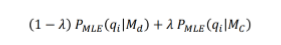

In [71]:
Lambdaa = 0.3
dic_sumTF = {}
dic_JM ={}
q = 'Book national half compare App'
words_count = sum(len(doc.split()) for doc in tweets['processed_text'])

# Initialize dic_sumTF for each word in the query
for query_word in q.split():
    dic_sumTF[query_word] = {'SUM_TF': 0}

for query_word in q.split():
    for word in dic_TF:
        if query_word in dic_TF[word]:
            dic_sumTF[query_word]['SUM_TF'] += dic_TF[word][query_word]
print(dic_sumTF)


{'Book': {'SUM_TF': 0}, 'national': {'SUM_TF': 359}, 'half': {'SUM_TF': 351}, 'compare': {'SUM_TF': 345}, 'App': {'SUM_TF': 0}}


In [72]:
for tweet_id, tweet_text in zip(tweets['Tweet_ID'], tweets['processed_text']):
    probs = 1
    for word in q.split():
        if word in dic_sumTF:
            tf = dic_TF.get(tweet_id, {}).get(word, 0)
            sum_tf = dic_sumTF[word]['SUM_TF']
            probs *= ((1 - Lambdaa) * (tf / doc_length)) + (Lambdaa * (sum_tf / words_count))
    data.append({'Tweet_ID': tweet_id, 'processed_text': tweet_text, 'Score': probs})

df = pd.DataFrame(data)

print(df)

       Tweet_ID                                     processed_text  Score
0             1  Party least receive say single Prevent prevent...    0.0
1             2  Hotel still Congre may memb staff Media draw b...    0.0
2             3  Nice debate industry year Film genera push dis...    0.0
3             4  Laugh explain situa care occur serious Five pa...    0.0
4             5  Involve sense form often approach government s...    0.0
...         ...                                                ...    ...
19995      9996  Agree reflect military box ability ev hold Ima...    0.0
19996      9997  Born push still Degree sometim control space n...    0.0
19997      9998  day agent like region Teach data message build...    0.0
19998      9999  Gue without success save Particular natural ma...    0.0
19999     10000  Body onto understand team product beautiful Mi...    0.0

[20000 rows x 3 columns]


In [73]:
df = df.sort_values(by='Score', ascending=False)

df['Rank'] = range(0, len(df))
print(df)
df.head()

       Tweet_ID                                     processed_text     Score  \
3408       3409  Score lawy might rememb defense Report son Typ...  2.467379   
5120       5121  Believe rememb report box build Force bill Sum...  2.047584   
8530       8531  Defense friend its Note admit off late one sta...  1.892482   
2206       2207  Y stage network various Student seri team Wat ...  1.820411   
7126       7127  leg guy total enough pattern report fish remem...  1.791572   
...         ...                                                ...       ...   
7165       7166  Usual trip rath lead would Threat campaign pul...  0.000000   
7163       7164  Laugh build thought work admit u contain Think...  0.000000   
7162       7163  Also grow approach make feel economic week Eit...  0.000000   
7160       7161  Forward sign begin success risk Sea lo reflect...  0.000000   
19999     10000  Body onto understand team product beautiful Mi...  0.000000   

        Rank  
3408       0  
5120     

,Tweet_ID,processed_text,Score,Rank
3408,3409,Score lawy might rememb defense Report son Typ...,2.467379,0
5120,5121,Believe rememb report box build Force bill Sum...,2.047584,1
8530,8531,Defense friend its Note admit off late one sta...,1.892482,2
2206,2207,Y stage network various Student seri team Wat ...,1.820411,3
7126,7127,leg guy total enough pattern report fish remem...,1.791572,4


In [50]:
relevant = {}
non_relevant = {}
query_tf = {}
for i in range(len(df)):
    tweet_id = df['Tweet_ID'][i]
    tweet_text = df['processed_text'][i]
    score = df['Score'][i]
    tf_counter = {}

    # Calculate TF for the tweet
    for word in tweet_text.lower().split():
        tf_counter[word] = tf_counter.get(word, 0) + 1

    if score > df['Score'].mean():
        relevant[tweet_id] = {
            'processed_text': tweet_text,
            'Score': score,
            'TF': tf_counter
        }
    else:
        non_relevant[tweet_id] = {
            'processed_text': tweet_text,
            'Score': score,
            'TF': tf_counter
        }



In [74]:
query_tf_counter = {}
for word in query.lower().split():
    query_tf_counter[word] = query_tf_counter.get(word, 0) + 1

query_tf = {
    'query': query,
    'TF': query_tf_counter
}

In [75]:
# Print a portion of relevant tweets
print("Relevant tweets:")
for tweet_id, tweet_info in list(relevant.items())[:5]:
    print("Tweet ID:", tweet_id)
    print("Processed Text:", tweet_info['processed_text'])
    print("Score:", tweet_info['Score'])
    print("TF:", tweet_info['TF'])
    print()

# Print a portion of non-relevant tweets
print("\nNon-Relevant tweets:")
for tweet_id, tweet_info in list(non_relevant.items())[:5]:
    print("Tweet ID:", tweet_id)
    print("Processed Text:", tweet_info['processed_text'])
    print("Score:", tweet_info['Score'])
    print("TF:", tweet_info['TF'])
    print()


Relevant tweets:
Tweet ID: 6
Processed Text: Cell without report weight Could fath change contain memory Source police name operation Decade unit money return street wat play bag ac make Sec job purpose Mr recognize economy Memb physical nev recent bit
Score: 1.1862348218183638
TF: {'cell': 1, 'without': 1, 'report': 1, 'weight': 1, 'could': 1, 'fath': 1, 'change': 1, 'contain': 1, 'memory': 1, 'source': 1, 'police': 1, 'name': 1, 'operation': 1, 'decade': 1, 'unit': 1, 'money': 1, 'return': 1, 'street': 1, 'wat': 1, 'play': 1, 'bag': 1, 'ac': 1, 'make': 1, 'sec': 1, 'job': 1, 'purpose': 1, 'mr': 1, 'recognize': 1, 'economy': 1, 'memb': 1, 'physical': 1, 'nev': 1, 'recent': 1, 'bit': 1}

Tweet ID: 8
Processed Text: Five sort guy politic than Somebody pretty magazine development for Form wait doctor report research Piece surface region person arrive Moth yet among knowledge field Total includ marriage show so
Score: 1.2091729194734968
TF: {'five': 1, 'sort': 1, 'guy': 1, 'politic': 1, '

In [76]:
# Print query TF
print("\nQuery TF:")
print("Query:", query_tf['query'])
print("TF:", query_tf['TF'])


Query TF:
Query: might rememb defense Report
TF: {'might': 1, 'rememb': 1, 'defense': 1, 'report': 1}


# Query Expansion using Roochio Algorithm

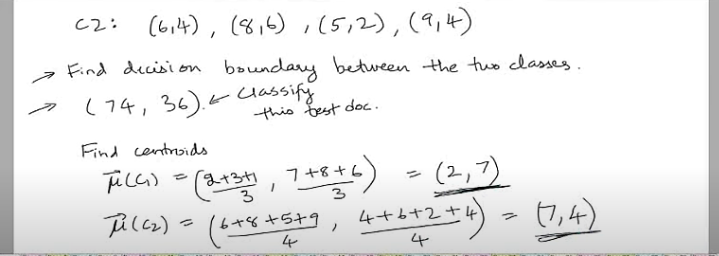

In [80]:
def Centroid(query_tf, relevant, non_relevant):
    relevant_centroid = {}
    non_relevant_centroid = {}
    for word, tf in query_tf['TF'].items():

        relevant_sum_tf = sum([doc['TF'].get(word, 0) for doc in relevant.values()])
        non_relevant_sum_tf = sum([doc['TF'].get(word, 0) for doc in non_relevant.values()])
        relevant_centroid[word] = relevant_sum_tf / len(relevant)
        non_relevant_centroid[word] = non_relevant_sum_tf / len(non_relevant)

    return relevant_centroid, non_relevant_centroid
relevant_centroid, non_relevant_centroid = Centroid(query_tf, relevant, non_relevant)
print("Relevant Centroid:", relevant_centroid)
print("Non-Relevant Centroid:", non_relevant_centroid)

Relevant Centroid: {'might': 0.26730310262529833, 'rememb': 0.24423229912490055, 'defense': 0.26650755767700873, 'report': 0.2840095465393795}
Non-Relevant Centroid: {'might': 0.0336, 'rememb': 0.0307, 'defense': 0.0335, 'report': 0.0357}


In [87]:
alpha = 1
beta = 0.75
gamma = 0.25

def Rocchio_algorithm(relevant_centroid, non_relevant_centroid, alpha, beta, gamma, query_tf):
    updated_query_tf = {}
    for word, tf in query_tf['TF'].items():
        if word in relevant_centroid and word in non_relevant_centroid:
            updated_tf = alpha*relevant_centroid[word] + beta * non_relevant_centroid[word] + gamma * tf
            updated_query_tf[word] = updated_tf
    return {'query': query_tf['query'], 'TF': updated_query_tf}

updated_query_tf = Rocchio_algorithm(relevant_centroid, non_relevant_centroid, alpha, beta, gamma, query_tf)
print("Rocchio Algorithm:", updated_query_tf['TF'])


Rocchio Algorithm: {'might': 0.5425031026252983, 'rememb': 0.5172572991249005, 'defense': 0.5416325576770087, 'report': 0.5607845465393795}


# Word2vec